<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 04  </font></center></h1>
<h2><center> <font color='black'> Cross-Selling/ Up-selling & Recommendation System</font></center></h2>   

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Market Basket Analysis            -> 2.0 points
- Collaborative Filtering           -> 3.5 points
- Recommender Systems Evaluation    -> 1.0 points
- Neural Network                    -> 2.5 points
_________________________________________________
Total                               -> 9.0 points
</pre>

# 1.  Market Basket Analysis (2 points)

**1.1 Consider the following businesses and think about one case of cross selling and one case of up selling techniques they could use. This question is not restricted to only traditional, standard examples.(1 points)**

a. An OnlineTravel Agency like Booking.com or AirBnB

<font color='red'> **Cross selling:**</font> recommendations of various excursions and tourist tours at the place of booked accommodation.

<font color='red'> **Up selling:**</font> free booking cancellation by increasing of booking price for rental.

b. A software company which produces products related to cyber security like Norton, Kaspersky, Avast and similar ones. 

<font color='red'> **Cross selling:**</font> after purchasing a subscription for desktop versions providing a discounted subscription for mobile platforms.

<font color='red'> **Up selling:**</font> providing the cheapest monthly subscription plan when purchasing an annual subscription.

c. A company that sells cell phones 

<font color='red'> **Cross selling:**</font> additional provision of cell phone accessories for the customer - charger, protective glass, case, headphones.

<font color='red'> **Up selling:**</font> for an additional extra-charge offering a more powerful cell phone modification with more memory storage, faster processor, more powerful camera.

d. A supermarket like Konsum, Rimi, Maxima etc. 

<font color='red'> **Cross selling:**</font> provision of products from different brands which are complimenting each other. For example, fried potato and ketchup, or toothbrush and toothpaste.

<font color='red'> **Up selling:**</font> providing discounts on the purchase of a larger quantity of goods. For example, a discount on the purchase of 2 buns

**1.2 Let's suppose that our client is a retail company that has an online shop. They gave us a dataset about online sales of their products. The client wants to know which product bundles to promote. Find 5 association rules with the highest lift.**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('OnlineRetailPurchase.csv', header=0 )

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**1.3 Use describe function from pandas to get statistical information about the values in the dataframe.(0.2 points)**

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,10000.000000,10000.000000,7709.000000
mean,7.828600,3.837412,15615.462576
std,104.322417,14.310148,1756.540802
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14388.000000
50%,2.000000,2.510000,15605.000000
75%,8.000000,4.210000,17228.000000
max,2880.000000,887.520000,18239.000000


**1.4 Create a dataframe name as "Basket", where each row has an distintive value of InvoiceNo and each column has a distinctive Description. The cells in the table contain the count of each item (Description) mentioned in one invoice. For example basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'] has a value of 1 because the product with WHITE HANGING HEART T-LIGHT HOLDER was entered  only once in the invoice 536365. (0.2 points)**

In [ ]:
basket = pd.crosstab(index=df['InvoiceNo'], columns=df['Description'])
basket

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK,amazon
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C537132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C537143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C537157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER']

1

**1.5 Some products are mentioned more than once in one invoice. You can check the maximum number for each column to verify. Modify your dataframe such that every cell which has a value higher than one will be replaced with 1. If the cell has the value 0 it will remain the same. (0.2 points)** <br>
NB: If your implementation in 1.4 already takes care of this, please skip the question. 

In [ ]:
# one-hot encoding 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_frame = basket.applymap(encode_units)

In [ ]:
basket_frame

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK,amazon
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C537132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C537143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C537157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**1.5 We do not need to spend time on calculating the association rules by ourselves as there already exists a package for python to do so, called mlxtend. We are going to use the mlxtend package to find frequent items bought together and then create some rules on what to recomend to a user based on what he/she/they have bought. We have given you the first part of the code which calculates the frequent items bought together. (0.2 points)**

In [ ]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import math

In [ ]:
pd.get_dummies(df)

,Quantity,UnitPrice,CustomerID,InvoiceNo_536365,InvoiceNo_536366,InvoiceNo_536367,InvoiceNo_536368,InvoiceNo_536369,InvoiceNo_536370,InvoiceNo_536371,...,Country_Italy,Country_Japan,Country_Lithuania,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,6,2.55,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3.39,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8,2.75,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6,3.39,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,3.39,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,9.95,13174.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,2,4.95,13174.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,2,4.95,13174.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9998,2,2.55,13174.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
frequent_itemsets = apriori(basket_frame, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.036170,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.034043,(12 PENCILS SMALL TUBE RED RETROSPOT)
2,0.046809,(6 RIBBONS RUSTIC CHARM)
3,0.051064,(60 CAKE CASES VINTAGE CHRISTMAS)
4,0.034043,(60 TEATIME FAIRY CAKE CASES)
...,...,...
859,0.031915,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE B..."
860,0.031915,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE B..."
861,0.031915,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE B..."
862,0.031915,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE B..."


**Please read the documentation of the associaton rules function in mlextend [here](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) and complete the code so we get the 5 rules with the highest lift. Print those rules. For example if user bought product basket A then  the algorithm recommends product basket B. (0.2 points)**

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(60 CAKE CASES VINTAGE CHRISTMAS),0.091489,0.051064,0.031915,0.348837,6.831395,0.027243,1.457295
1,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.051064,0.091489,0.031915,0.625000,6.831395,0.027243,2.422695
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.044681,0.053191,0.038298,0.857143,16.114286,0.035921,6.627660
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.053191,0.044681,0.038298,0.720000,16.114286,0.035921,3.411854
4,(HOT WATER BOTTLE TEA AND SYMPATHY),(CHOCOLATE HOT WATER BOTTLE),0.068085,0.059574,0.036170,0.531250,8.917411,0.032114,2.006241


In [ ]:
for index, row in (rules.iloc[:5]).iterrows():
    print("If the customer buys " + str(row['antecedents']))
    print("")
    print("The recommender recommends "+str(row['consequents']))
    print("")
    print("")
    print("")

If the customer buys frozenset({'PAPER CHAIN KIT VINTAGE CHRISTMAS'})

The recommender recommends frozenset({'60 CAKE CASES VINTAGE CHRISTMAS'})



If the customer buys frozenset({'60 CAKE CASES VINTAGE CHRISTMAS'})

The recommender recommends frozenset({'PAPER CHAIN KIT VINTAGE CHRISTMAS'})



If the customer buys frozenset({'ALARM CLOCK BAKELIKE RED '})

The recommender recommends frozenset({'ALARM CLOCK BAKELIKE GREEN'})



If the customer buys frozenset({'ALARM CLOCK BAKELIKE GREEN'})

The recommender recommends frozenset({'ALARM CLOCK BAKELIKE RED '})



If the customer buys frozenset({'HOT WATER BOTTLE TEA AND SYMPATHY'})

The recommender recommends frozenset({'CHOCOLATE HOT WATER BOTTLE'})





# 2. Collaborative filtering (3.5 points )

We are going to use Books.csv dataset which contains  ratings from Amazon website and the data has the following features:

UserID: The ID of the users who read the books

BookTitle: The title of the book

Book-Rating: A rating given to the book in a scale from 0 to 10

Below we are going to perform the same steps we did with movies dataset in the practice session

**2.0 Load the dataset and take a look at the books titles. And pick a favorite book (any book).(0.1 points)**

In [ ]:
df_book = pd.read_csv('Books.csv', header=0 )
df_book.head()

,UserID,Book-Rating,BookTitle
0,6181,0,Flesh Tones: A Novel
1,62,5,Flesh Tones: A Novel
2,163,0,Flesh Tones: A Novel
3,212,5,Flesh Tones: A Novel
4,250,9,Flesh Tones: A Novel


In [ ]:
# my favorite book
df_book[df_book['BookTitle'] == 'Harry Potter and the Order of the Phoenix (Book 5)'].head()

,UserID,Book-Rating,BookTitle
1818,6198,7,Harry Potter and the Order of the Phoenix (Boo...
1819,6283,10,Harry Potter and the Order of the Phoenix (Boo...
1820,7,0,Harry Potter and the Order of the Phoenix (Boo...
1821,56,9,Harry Potter and the Order of the Phoenix (Boo...
1822,117,0,Harry Potter and the Order of the Phoenix (Boo...


In [ ]:
df_book.iloc[1819]

UserID                                                      6283
Book-Rating                                                   10
BookTitle      Harry Potter and the Order of the Phoenix (Boo...
Name: 1819, dtype: object

**2.1 You have to apply KNN algorithm for collaborative filtering. As KNN algorithm does not accept strings, use a Label Encoder for BookTitle column.After that reshape the books matrix so that every column will be a UserID and every row a BookTitle. (0.45 points)**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# reference: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
df_book_encoded = df_book.apply(LabelEncoder().fit_transform)
df_book_encoded = df_book_encoded.rename(columns={"BookTitle": "Book_Encoded"})
df_book_encoded

,UserID,Book-Rating,Book_Encoded
0,6181,0,124
1,62,5,124
2,163,0,124
3,212,5,124
4,250,9,124
...,...,...,...
9995,3663,0,333
9996,3665,0,333
9997,3666,3,333
9998,3668,9,333


In [ ]:
df_book_encoded_drop = df_book_encoded.drop_duplicates(['UserID', 'Book_Encoded'])
df_book_encoded_drop

,UserID,Book-Rating,Book_Encoded
0,6181,0,124
1,62,5,124
2,163,0,124
3,212,5,124
4,250,9,124
...,...,...,...
9995,3663,0,333
9996,3665,0,333
9997,3666,3,333
9998,3668,9,333


In [ ]:
book_matrix = df_book_encoded_drop.pivot(index = 'Book_Encoded', columns = 'UserID', values = 'Book-Rating').fillna(0)
print(book_matrix.shape)

(336, 6292)


In [ ]:
book_matrix.head()

UserID,0,1,2,3,4,5,6,7,8,9,...,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291
Book_Encoded,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**2.2 Build a sparse matrix for books data and show it. (0.45 points)**

In [ ]:
# transform matrix to scipy sparse matrix

from scipy.sparse import csr_matrix

book_matrix_sparse = csr_matrix(book_matrix.values)
print(f"Sparse matrix:\n{book_matrix_sparse}")

Sparse matrix:
  (1, 6228)	5.0
  (2, 365)	7.0
  (2, 5110)	9.0
  (2, 5226)	10.0
  (2, 6209)	10.0
  (3, 91)	7.0
  (3, 135)	8.0
  (3, 139)	10.0
  (3, 258)	9.0
  (3, 429)	6.0
  (3, 760)	5.0
  (3, 821)	6.0
  (3, 869)	9.0
  (3, 984)	10.0
  (3, 1328)	5.0
  (3, 1425)	10.0
  (3, 1781)	2.0
  (3, 1815)	9.0
  (3, 1820)	9.0
  (3, 1951)	8.0
  (3, 2360)	8.0
  (3, 2384)	8.0
  (3, 2449)	9.0
  (3, 2468)	7.0
  (3, 2956)	5.0
  :	:
  (333, 3411)	4.0
  (333, 3416)	1.0
  (333, 3433)	8.0
  (333, 3445)	5.0
  (333, 3450)	2.0
  (333, 3456)	4.0
  (333, 3461)	8.0
  (333, 3491)	2.0
  (333, 3497)	1.0
  (333, 3501)	4.0
  (333, 3518)	8.0
  (333, 3519)	3.0
  (333, 3527)	7.0
  (333, 3543)	7.0
  (333, 3546)	9.0
  (333, 3547)	7.0
  (333, 3573)	5.0
  (333, 3575)	1.0
  (333, 3581)	7.0
  (333, 3597)	3.0
  (333, 3602)	6.0
  (333, 3666)	3.0
  (333, 3668)	9.0
  (333, 6250)	2.0
  (333, 6277)	9.0


**2.3 Initialize and train two different KNN models (use cosine metric for similarity for both) but with different n_neighbours, 2 and 10. Recommend top 5 books based on your favourite one in both cases (1 points)**<br>
NB: You are free to choose a favorite book (any book) based on which you have to recommend 5 books.

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# create new data frame

book_label = pd.concat([df_book_encoded, df_book], axis = 1)
book_label = book_label[['Book_Encoded', 'BookTitle']]
book_label = book_label.drop_duplicates()

book_label.head()

,Book_Encoded,BookTitle
0,124,Flesh Tones: A Novel
53,252,Rites of Passage
55,295,The Notebook
159,150,Help!: Level 1
160,271,The Amsterdam Connection : Level 4 (Cambridge ...


In [ ]:
# create mapper 

book_to_idx = {
    book: i for i, book in enumerate(list(book_label.set_index('Book_Encoded').loc[book_matrix.index].BookTitle))
}
book_to_idx

{'007 El Mundo Nunca Es Suficiente': 0,
 '4000 Vornamen aus aller Welt. Von Alexander bis Zoe.': 1,
 "A Kid's Guide to How to Save the Planet (Camelot world)": 2,
 'A Kiss of Shadows (Meredith Gentry Novels (Paperback))': 3,
 'A Painted House': 4,
 'A String in the Harp': 5,
 'A Wrinkle In Time': 6,
 'Adressat unbekannt.': 7,
 'Advanced Photography, Sixth Edition': 8,
 'Alaska': 9,
 "Alice's Adventures in Wonderland and Through the Looking Glass": 10,
 'Alone with the Dead (Joe Keough Mysteries (Paperback))': 11,
 'Along Came a Spider (Alex Cross Novels)': 12,
 'Alte Freunde, neue Feinde. Ein Fall f�?¼r Bernhard Gunther.': 13,
 'Anna Karenina': 14,
 'Apricots on the Nile: A Memoir with Recipes': 15,
 'Artemis Fowl (Artemis Fowl, Book 1)': 16,
 'Artemis Fowl.': 17,
 'Asche zu Asche.': 18,
 'At the Edge': 19,
 'Attack Of The Deranged Mutant Killer Snow Goons': 20,
 'Auf Ehre und Gewissen. Roman.': 21,
 'Auf der Suche nach dem verlorenen Gl�?¼ck.': 22,
 'Auf d�?¼nnem Eis.': 23,
 "BD Pirat

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

# recommendations

def fuzzy_matching(mapper, fav_book, verbose=True):
  match_tuple = []
  # get match
  for title, idx in mapper.items():
    ratio = fuzz.ratio(title.lower(), fav_book.lower())
    if ratio >= 60:
      match_tuple.append((title, idx, ratio))
  
  # sort
  match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
  if not match_tuple:
    print('Oops! No match is found')
    return
  if verbose:
    print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
  return match_tuple[0][1]


def make_recommendation(model_knn, data, mapper, fav_book, n_recommendations):
  # fit
  model_knn.fit(data)

  # get input
  print('You have input book:', fav_book)
  idx = fuzzy_matching(mapper, fav_book, verbose=True)

  # inference
  print('Recommendation system start to make inference')
  print('......\n')
  distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)

  # get list of raw idx of recommendations
  raw_recommends = \
    sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

  # get reverse mapper
  reverse_mapper = {v: k for k, v in mapper.items()}

  # print recommendations
  print('Recommendations for {}:'.format(fav_book))
  for i, (idx, dist) in reversed(list(enumerate(raw_recommends))):
    #j =i
    print('{0}: {1}, with distance of {2}'.format(n_recommendations-i, reverse_mapper[idx], dist))


In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

# define model

model_1_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=2, n_jobs=-1)
model_2_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)

# fit the model 1
model_1_knn.fit(book_matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=2)

In [ ]:
# fit the model 2
model_2_knn.fit(book_matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [ ]:
my_favorite = 'Harry Potter and the Order of the Phoenix (Book 5)'

# recommendations from model 1

make_recommendation(
    model_knn=model_1_knn, 
    data=book_matrix_sparse, 
    fav_book=my_favorite, 
    mapper=book_to_idx, 
    n_recommendations=5) 

You have input book: Harry Potter and the Order of the Phoenix (Book 5)
Found possible matches in our database: ['Harry Potter and the Order of the Phoenix (Book 5)', "Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):
1: Moon Handbooks: Hawaii, with distance of 0.9281630286084136
2: A Wrinkle In Time, with distance of 0.9367295186553608
3: The Second Summer of the Sisterhood, with distance of 0.9397670038835066
4: The Da Vinci Code, with distance of 0.9401336850106279
5: Quidditch Through the Ages, with distance of 0.9412078850185526


In [ ]:
my_favorite = 'Harry Potter and the Order of the Phoenix (Book 5)'

# recommendations from model 2

make_recommendation(
    model_knn=model_2_knn, 
    data=book_matrix_sparse, 
    fav_book=my_favorite, 
    mapper=book_to_idx, 
    n_recommendations=5) 

You have input book: Harry Potter and the Order of the Phoenix (Book 5)
Found possible matches in our database: ['Harry Potter and the Order of the Phoenix (Book 5)', "Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Order of the Phoenix (Book 5):
1: Moon Handbooks: Hawaii, with distance of 0.9281630286084136
2: A Wrinkle In Time, with distance of 0.9367295186553608
3: The Second Summer of the Sisterhood, with distance of 0.9397670038835066
4: The Da Vinci Code, with distance of 0.9401336850106279
5: Quidditch Through the Ages, with distance of 0.9412078850185526


**2.4 Discuss the results you received from both models. Which one worked better? (0.25 points)**

<font color='red'> **Answer:**</font> Both model 1 and model 2 gave the same result. So there is no difference between them.

**2.5 Add a new user (with user “UserID” = 6293) in your data. Using the two trained models in task 2.3 suggest which books should this user read if his ratings are:**

French Cuisine for All: 4


Harry Potter and the Sorcerer's Stone Movie Poster Book: 5


El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer: 1

**(1. 25 points)**



In [ ]:
book_label[book_label['BookTitle'] == 'French Cuisine for All']

,Book_Encoded,BookTitle
4625,128,French Cuisine for All


In [ ]:
book_label[book_label['BookTitle'] == "Harry Potter and the Sorcerer's Stone Movie Poster Book"]

,Book_Encoded,BookTitle
8062,145,Harry Potter and the Sorcerer's Stone Movie Po...


In [ ]:
book_label[book_label['BookTitle'] == "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"] 

,Book_Encoded,BookTitle
5711,116,El Perfume: Historia De UN Asesino/Perfume : T...


In [ ]:
user_book_df = pd.DataFrame({"UserID":[6293, 6293, 6293],
                             "Book-Rating":[4, 5, 1],
                             "Book_Encoded":[128, 145, 116]})

user_book_df

,UserID,Book-Rating,Book_Encoded
0,6293,4,128
1,6293,5,145
2,6293,1,116


In [ ]:
df_book_encoded_user = df_book_encoded.append(user_book_df)

df_book_encoded_user = df_book_encoded_user.drop_duplicates()
df_book_encoded_user.head()

,UserID,Book-Rating,Book_Encoded
0,6181,0,124
1,62,5,124
2,163,0,124
3,212,5,124
4,250,9,124


In [ ]:
df_book_encoded_user_drop = df_book_encoded_user.drop_duplicates(['UserID', 'Book_Encoded'])
df_book_encoded_drop

book_matrix_user = df_book_encoded_user_drop.pivot(index = 'Book_Encoded', columns = 'UserID', values = 'Book-Rating').fillna(0)
book_matrix_user_sparse = csr_matrix(book_matrix_user.values)

In [ ]:
my_favorite = "Harry Potter and the Sorcerer's Stone Movie Poster Book"

In [ ]:
# model 1 recommendation

make_recommendation(
    model_knn=model_1_knn, # trained model (model)
    data=book_matrix_user_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)


You have input book: Harry Potter and the Sorcerer's Stone Movie Poster Book
Found possible matches in our database: ["Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Sorcerer's Stone Movie Poster Book:
1: French Cuisine for All, with distance of 0.7974521265832667
2: El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer, with distance of 0.97756064455674
3: Matilda, with distance of 1.0
4: Night Sins, with distance of 1.0
5: Nadie Es Perfecto (Narrativa Actual), with distance of 1.0


In [ ]:
# model 2 recommendation

make_recommendation(
    model_knn=model_2_knn, # trained model (model)
    data=book_matrix_user_sparse, # sparse matrix (data)
    fav_book=my_favorite, # fav_book
    mapper=book_to_idx, # {book: index} (mapper)
    n_recommendations=5)

You have input book: Harry Potter and the Sorcerer's Stone Movie Poster Book
Found possible matches in our database: ["Harry Potter and the Sorcerer's Stone Movie Poster Book", 'Harry Potter and the Prisoner of Azkaban']

Recommendation system start to make inference
......

Recommendations for Harry Potter and the Sorcerer's Stone Movie Poster Book:
1: French Cuisine for All, with distance of 0.7974521265832667
2: El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer, with distance of 0.97756064455674
3: Matilda, with distance of 1.0
4: Night Sins, with distance of 1.0
5: Nadie Es Perfecto (Narrativa Actual), with distance of 1.0


# 3. Recommender systems evaluation (1 points)

We are going to compare different methods of recommender systems by their RMSE score. One useful package that has several recommender algorithms for Python is [Surprise](https://surprise.readthedocs.io/en/stable/getting_started.html). Below we have split the books dataset into training and test and used the KNNBasic algorithm to predict the ratings for the test set using surprise. 

In [ ]:
!pip install surprise
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic

# The reader is necessary for surprise to interpret the ratings
reader = Reader(rating_scale=(0, 10))

# This function loads data from a pandas dataframe into surprise dataset structure
# The columns should always be ordered like this
data = Dataset.load_from_df(df_book[['UserID', 'BookTitle', 'Book-Rating']], reader)

# Split in trainset and testset
# No need to define the label y because for surprise the last column is always the rating
trainset, testset = train_test_split(data, test_size=.25, random_state=0 )

knn = KNNBasic()
knn.fit(trainset)
predictions = knn.test(testset)
print('KNN RMSE', accuracy.rmse(predictions))


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.1033
KNN RMSE 4.10333158257073


**3.1 After taking a look at surprise documentation and the code above, follow the same steps as with KNN, and predict the ratings in test set using the NormalPredictor which predicts a random rating based on the distribution of the training set. Do the same for SVD which  is a matrix factorization technique. For both of them report RMSE. (1 points)**

In [ ]:
import pandas as pd
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [ ]:
data = Dataset.load_from_df(df_book[['UserID', 'BookTitle', 'Book-Rating']], reader)

In [ ]:
# Normal Predictor

trainset, testset = train_test_split(data, test_size=.25, random_state=0 )
predictor = NormalPredictor()
predictor.fit(trainset)
predictions = predictor.test(testset)
print(accuracy.rmse(predictions, verbose=True))

RMSE: 5.1623
5.162288379621454


In [ ]:
# SVD

trainset, testset = train_test_split(data, test_size=.25, random_state=0 )
svd = SVD()
svd.fit(trainset)
predictions2 = svd.test(testset)
print(accuracy.rmse(predictions2, verbose=True))

RMSE: 3.8453
3.8452836677585585


# 4. Neural Networks (2.5 Points)

**4.1 We are now going to build a recommender system using Neural Networks. Being this dataset is really small in terms of features you might not see great improvements but it is a good starting point to learn. Please build  one of the neural network architechtures as we did in practice session part 3. You can for example choose the one which had the following layers:**
- 2 Embedding
- 2 Reshape
- 1 Concatenation 
- 1 Dense

**Use the Neural Network you built to learn from the train data of part 3 of this homework.  The column UserID should be used as input to your NN for the user embedding layer. For the books embedding layer we will use BookTitle column. Lastly, the ratings will be your target variable. Regarding the evaluation metric for the training phase use RMSE. To make your training fast you can use a batch size of 200 or above. (1.5 points)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from keras import backend

from keras.layers import Input, Embedding, Flatten, Dot, Dense, multiply, Concatenate, Dropout, Reshape, Activation
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras import backend as kb

#Method for RMSE calculation
def rmse(true_label, pred_label):
    result = kb.sqrt(kb.mean(kb.square(pred_label - true_label), axis=-1))
    return result

user_book_df = pd.DataFrame({"UserID":[6293, 6293, 6293],
                             "Book-Rating":[4, 5, 1],
                             "BookTitle":['French Cuisine for All', 
                                          "Harry Potter and the Sorcerer's Stone Movie Poster Book", 
                                          "El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer"]})
df_book = df_book.append(user_book_df)


# Data preparation
X = df_book[['UserID', 'BookTitle']].copy()

user_enc = LabelEncoder()
X['UserID'] = user_enc.fit_transform(X['UserID'].values)
n_users = X['UserID'].nunique()


title_enc = LabelEncoder()
X['BookTitle'] = title_enc.fit_transform(X['BookTitle'].values)
n_titles = X['BookTitle'].nunique()

X = X.values

y = np.array(df_book[["Book-Rating"]].copy()).flatten().astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

n_factors = 200 # This can be whatever we want

X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]


# Model
def BookRecommenderModel(n_users, n_titles, n_factors):
    #TODO: Embedding user id
    id_em = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(id_em)
    u = Reshape((n_factors,))(u)

    #TODO: Embedding the title (shape will be (None, 1, 50))
    title_em = Input(shape=(None, 1, 50))
    t = Embedding(n_titles, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(title_em)
    t = Reshape((n_factors,))(t)
    #TODO: Merge
    x = Concatenate()([u, t])
    x = Dropout(0.05)(x) # Some dropout to prevent overfitting

    x = Dense(10, kernel_initializer='he_normal')(x) # H.L


    #TODO: Output layer
    model = Model(inputs = (id_em, title_em), outputs = x)

    #TODO: Compile model
    model.compile(optimizer = 'Adam', loss = rmse, metrics = ['accuracy'])
    return model

model = BookRecommenderModel(n_users, n_titles, n_factors)

# Train model
history_nn=model.fit(X_train_array, y_train, batch_size = 200, epochs = 150)


Epoch 1/150
38/38 [==============================] - 1s 9ms/step - loss: 3.3619 - accuracy: 0.0874
Epoch 2/150
38/38 [==============================] - 0s 11ms/step - loss: 3.3252 - accuracy: 0.0832
Epoch 3/150
38/38 [==============================] - 0s 9ms/step - loss: 3.2409 - accuracy: 0.0838
Epoch 4/150
38/38 [==============================] - 0s 9ms/step - loss: 3.0516 - accuracy: 0.0825
Epoch 5/150
38/38 [==============================] - 0s 10ms/step - loss: 2.7346 - accuracy: 0.0778
Epoch 6/150
38/38 [==============================] - 0s 10ms/step - loss: 2.2766 - accuracy: 0.0753
Epoch 7/150
38/38 [==============================] - 1s 13ms/step - loss: 1.8186 - accuracy: 0.0824
Epoch 8/150
38/38 [==============================] - 1s 16ms/step - loss: 1.5126 - accuracy: 0.0853
Epoch 9/150
38/38 [==============================] - 1s 17ms/step - loss: 1.3194 - accuracy: 0.0904
Epoch 10/150
38/38 [==============================] - 1s 16ms/step - loss: 1.2113 - accuracy: 0.0949
Ep

**4.2 Plot the RMSE values during the training phase, as well as the model loss. Report the best RMSE. Is it better than the RMSE from the models we built in Section 2 and 3 ? (0.5 points)**

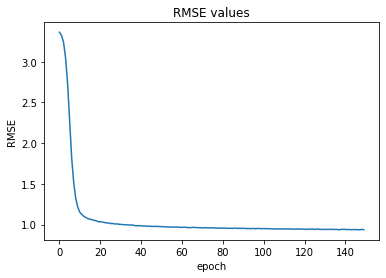

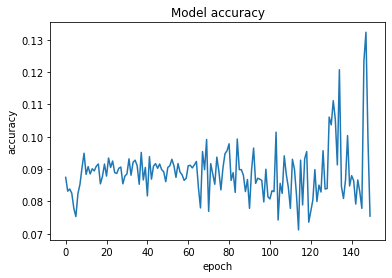

13/13 [==============================] - 0s 3ms/step - loss: 3.4136 - accuracy: 0.0292
Test RMSE: 3.4135682582855225
Test accuracy: 0.02918832376599312


In [ ]:
from matplotlib import pyplot

# training phase RMSE (model loss)
pyplot.plot(history_nn.history['loss'])
pyplot.title("RMSE values")
plt.ylabel('RMSE')
plt.xlabel('epoch')
pyplot.show()

# Out of interest, also plotted the model accuracy during training
pyplot.plot(history_nn.history['accuracy'])
pyplot.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
pyplot.show()

# Testing accuracy and RMSE
result=model.evaluate(X_test_array, y_test, batch_size = 200)
print('Test RMSE:', result[0])
print('Test accuracy:', result[1])

In [ ]:
# Let's find out the best RMSE
min(history_nn.history['loss'])

0.9339468479156494


<font color='red'> **Answer:**</font> This model's best RMSE is 0.93, which is much better than the RMSE from the models built in previous sections.

**4.3 Use your trained model to recommend books for user with ID 6293. (0.5 points)**

In [ ]:
6293 in df_book[['UserID']].values

True

In [ ]:
# Function to predict the ratings given User ID and book title
def predict_rating(user_id, book_title):
    transformed_title = title_enc.transform([book_title])[0]
    return model.predict([np.array([user_id]), np.array([transformed_title])])[0][0]

transformed_id = user_enc.transform([6293])[0]

user_ratings = df_book[df_book['UserID'] == transformed_id][['UserID', 'BookTitle', 'Book-Rating']]

recommendations = df_book[df_book['BookTitle'].isin(user_ratings['BookTitle']) == False][['BookTitle']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(transformed_id, x['BookTitle']), axis=1)
recommendations.sort_values(by='prediction', ascending=False).head(20)

,BookTitle,prediction
8164,Great British Ghosts (Longman Structural Reade...,8.692544
4565,Un Bon Petit Diable,8.233981
1735,Henry der Held.,6.799709
3181,Ubu Roi*,6.372845
4346,Der Sterne Tennisb�?¤lle.,6.293346
5947,The Music of Chance,5.599693
4850,Die Krone der Welt.,5.435706
3273,Le chateau des carpathes,5.313931
4628,The Complete Idiot's Guide to the Microsoft Ne...,4.853151
6012,The Year of Sharing (Oxford Bookworms),4.699239
